# Selecting features for practice 

In [2]:
import pandas as pd

In [3]:
pd_train = pd.read_csv('train.csv')
target_variable = pd_train[['GrLivArea','YearBuilt','SalePrice']]

Extracting explanatory and objective variables

In [4]:
target_variable.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# Estimation and evaluation by linear regression

- Analyze and preprocess of data via linear regression learning, estimation, evaluation, and visualization

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = target_variable.loc[:, ['GrLivArea', 'YearBuilt']] 
y = target_variable['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

reg = LinearRegression().fit(x_train_trans, y_train)
reg_pred = reg.predict(x_test_trans)

from sklearn.metrics import mean_squared_error
print('MSE', mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE 2314465092.7320137


- Visualization using scatterplot

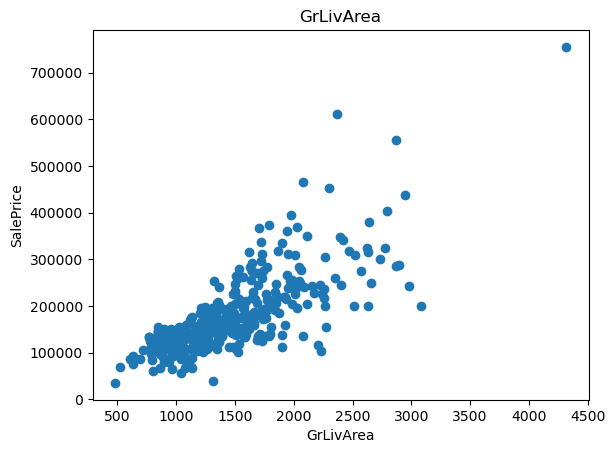

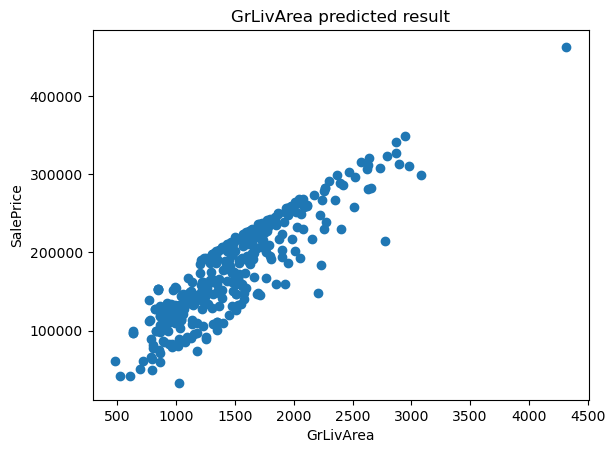

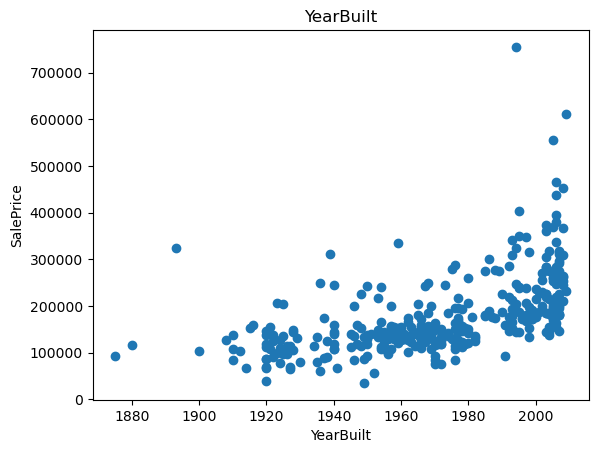

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x_test.loc[:, 'GrLivArea'], y_test, label='actual')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(x_test.loc[:, 'GrLivArea'], reg_pred, label='predicted')
plt.title('GrLivArea predicted result')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(x_test.loc[:, 'YearBuilt'], y_test)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

# Comparism of method 

Let's compare the following methods

- Linear regression
- SVM
- decision tree
- Random Forest

Linear Regression
MSE: 2314465092.7320137


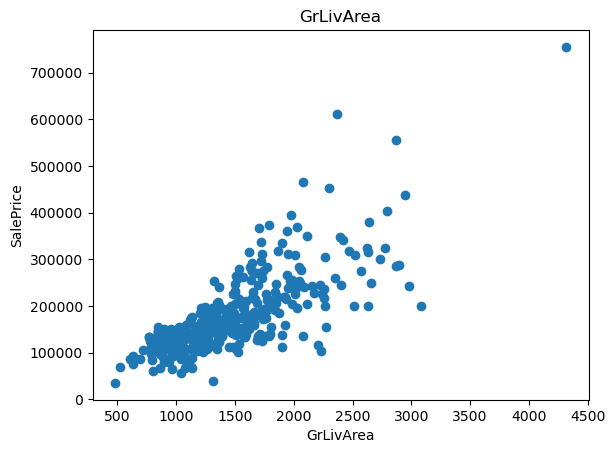

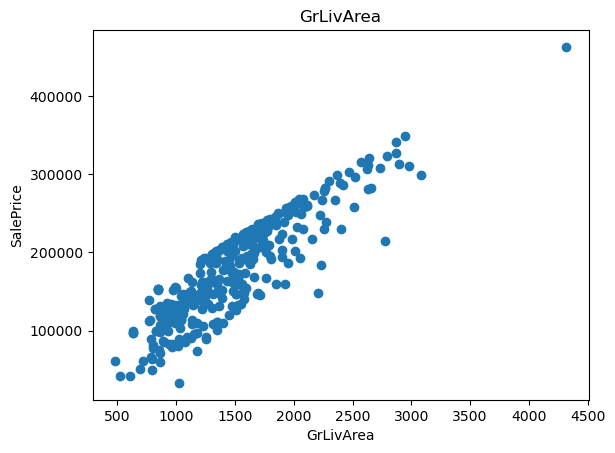

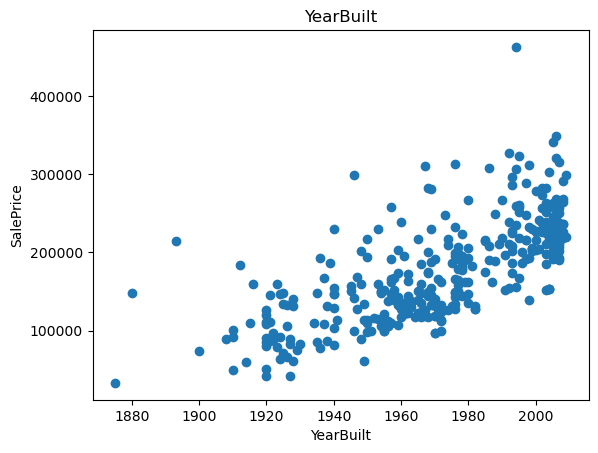

------------------------------------------
SVC
MSE: 3193384428.4328766


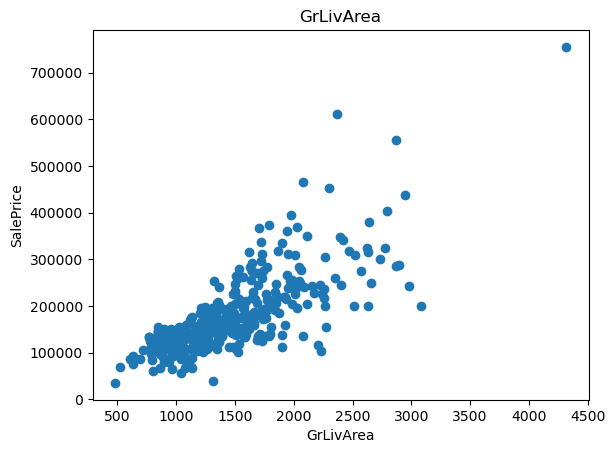

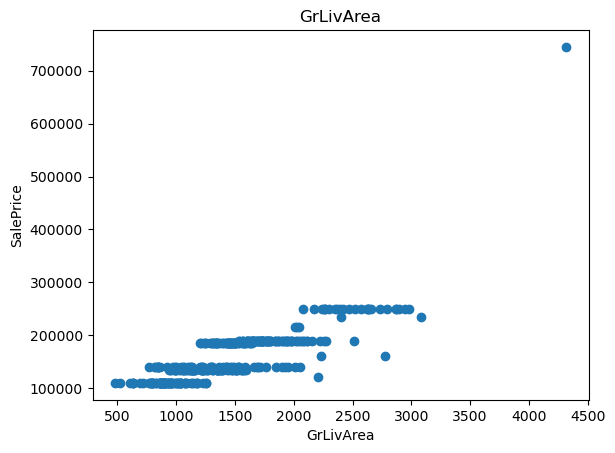

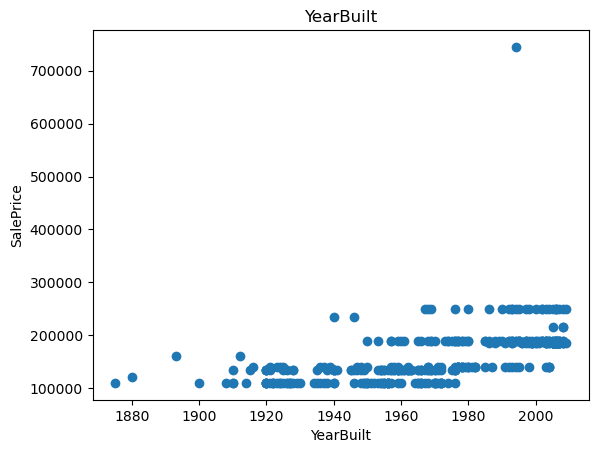

------------------------------------------
Decision tree
MSE: 2574250840.367123


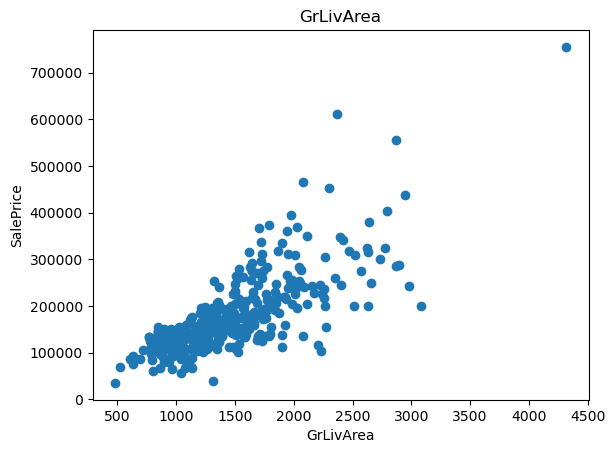

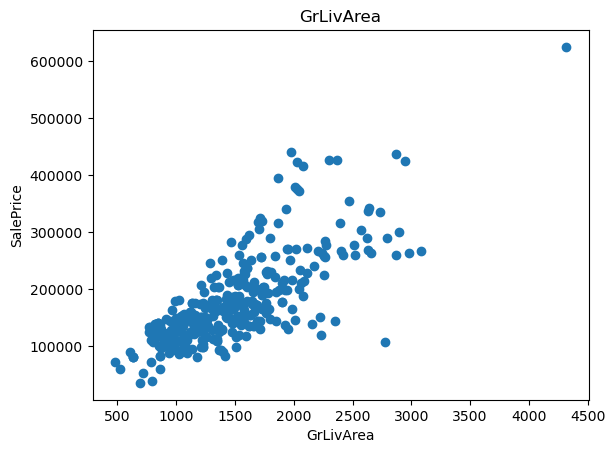

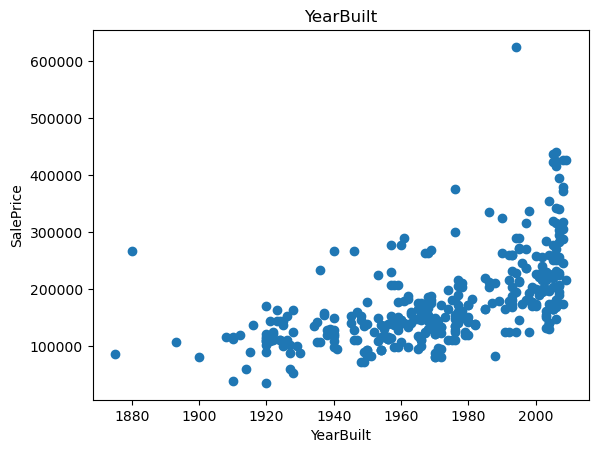

------------------------------------------
Random Forest
MSE: 3048039387.336986


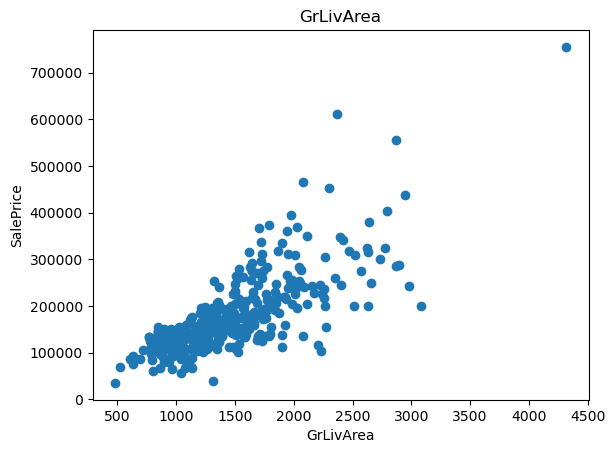

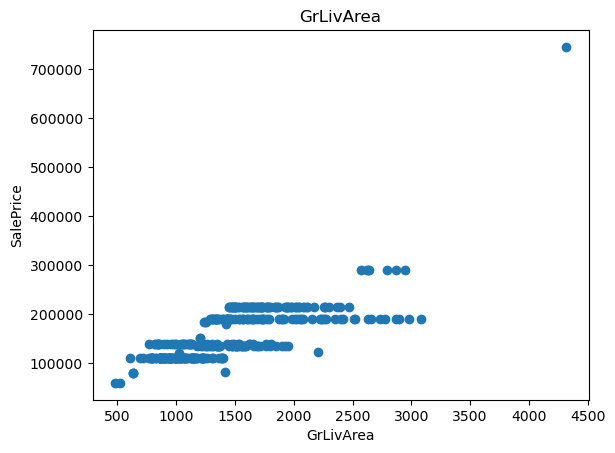

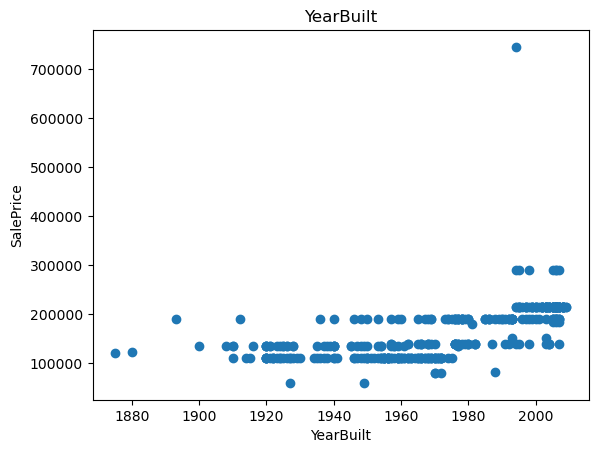

------------------------------------------


In [20]:
mSE_results = []
model_names = []

def display_outputs(title, y_prediction):
    #Calculate the MSE
    mSE = mean_squared_error(y_true=y_test, y_pred=y_prediction)
    
    #Let add the result to a list
    mSE_results.append(mSE)
    model_names.append(title)
    
    #display the result
    print(title)
    print('MSE:', mSE)
    
    #Let's visualized the extracted data
    plt.scatter(x_test.loc[:, 'GrLivArea'], y_test, label='actual')
    plt.title('GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()
    
    plt.scatter(x_test.loc[:, 'GrLivArea'], y_prediction)
    plt.title('GrLivArea')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()
    
    plt.scatter(x_test.loc[:, 'YearBuilt'], y_prediction)
    plt.title('YearBuilt')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()
    
    print('------------------------------------------')
    
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Linear Regression
reg = LinearRegression().fit(x_train_trans, y_train)

# Prediction
reg_pred = reg.predict(x_test_trans)

# Passing data into the outputing function
display_outputs('Linear Regression', reg_pred)

# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Fitting
clf.fit(x_train_trans, y_train)

# prediction
clf_pred = clf.predict(x_test_trans)
    
# Passing data into the outputing function
display_outputs('SVC', clf_pred)
    
# Decision tree
dTC = DecisionTreeClassifier(random_state=0)
    
# Fitting
dTC.fit(x_train_trans, y_train)
    
# Prediction
dTC_pred = dTC.predict(x_test_trans)
    
# Passing data into the outputing function
display_outputs('Decision tree', dTC_pred)

#Random forest
rFC = RandomForestClassifier(max_depth=2, random_state=0)
    
# Fitting
rFC.fit(x_train_trans, y_train)

# Prediction
rFC_pred = rFC.predict(x_test_trans)

# Passing data into the outputing function
display_outputs('Random Forest', rFC_pred)



In [21]:
# Tabulating the results
pd.DataFrame(mSE_results, index=model_names, columns=['MSE'])

,MSE
Linear Regression,2.314465e+09
SVC,3.193384e+09
Decision tree,2.574251e+09
Random Forest,3.048039e+09


- Linear regression appear to be the best as its mean squared error is closer to zero compared to other methods

# (Advanced Task) Learning using other features

In [22]:
pd_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
# Additiion of more target variables
target_var = pd_train[['SalePrice','GrLivArea','YearBuilt','YrSold']]

# Division into explanatory and explained variable
x = target_var.loc[:, ['GrLivArea','YearBuilt','YrSold']]
y = target_var['SalePrice']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Stardardization of data
scaler = StandardScaler()

# Fiting
scaler.fit(x_train)

# Transforming
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

# fitting 
reg = LinearRegression().fit(x_train_trans, y_train)

# Prediction 
reg_pred = reg.predict(x_test_trans)

# Displaying mSE
print('MSE:',mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2322954137.152041
